## Density Models Assignment

In [45]:
# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (8,8)

#import numpy
import numpy as np

# from sklearn import make_blobs
from sklearn.datasets import make_blobs

# import DBSCAN
from sklearn.cluster import DBSCAN

import itertools
import pandas as pd

## Task: Generate clusters with make_blobs function 

Use the following settings:
   * n_samples=150,
   * n_features=2,
   * centers=3,
   * cluster_std=0.6,
   * random_state=0

In [4]:
# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.6,
                  random_state=0)
y

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

* plot data points

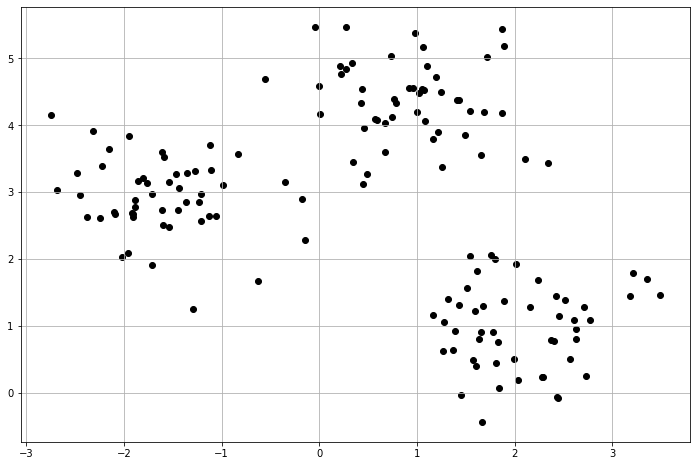

In [5]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

* define function plot_clusters

In [71]:
def plot_clusters( title, X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
#     Needed this to get subplots
#     if ax is None:
#         fig, ax = plt.subplots()
#     plt.subplot(3,3,counter)

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()




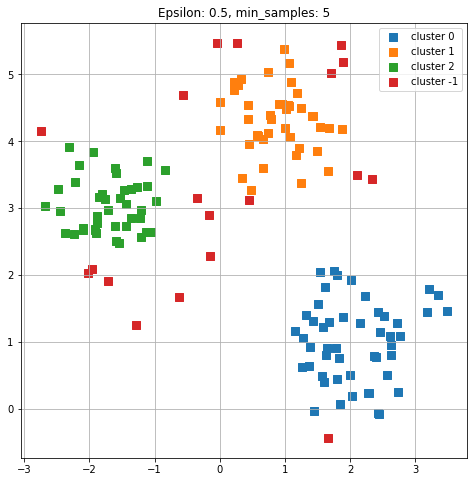

In [72]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)
plot_clusters("Epsilon: 0.5, min_samples: 5",X,y_db)

## Objective: 
Try to find optimal settings of `eps` and `min_samples` params of DBSCAN. You can iterate over multiple parameters combinations and plot the clustering results.

* define params space

In [73]:
def plot_params( eps, min_samples):
    db = DBSCAN(eps=eps,
        min_samples=min_samples,
        metric='euclidean')
    y_db = db.fit_predict(X)
    title = f'Epsilon: {eps}, Min Samples: {min_samples}'
    plot_clusters(title, X,y_db)

In [9]:
X.shape

(150, 2)

In [10]:
y_db.shape

(150,)

In [74]:
# Find centroid  add another column for centroid points
df_0 = df[df['y_db'] == 0]
centroid_x = df_0.x1.sum()/df_0.x1.count()
centroid_y = df_0.x2.sum()/df_0.x2.count()
centroid_y

1.0029017773155307

* combinations (hint: use 'product' function from 'itertools')

In [43]:
indices = list(itertools.product([0,1,2],[0,1,2]))
indices[1][0]

0

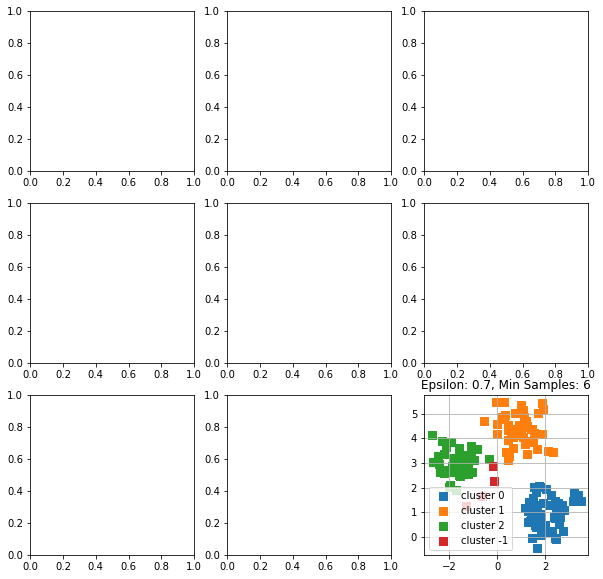

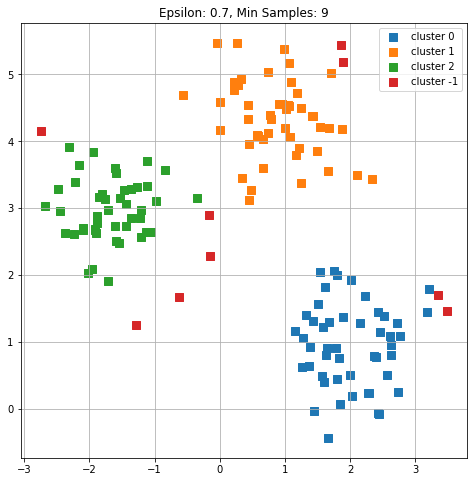

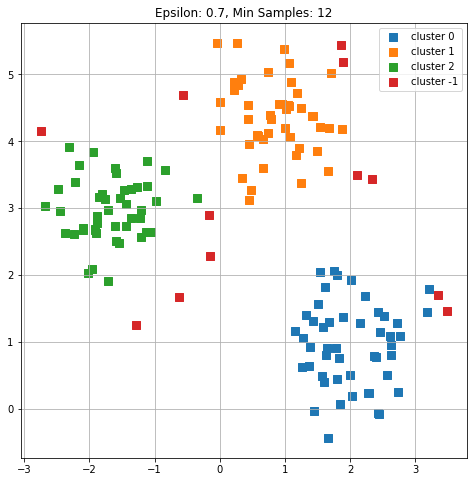

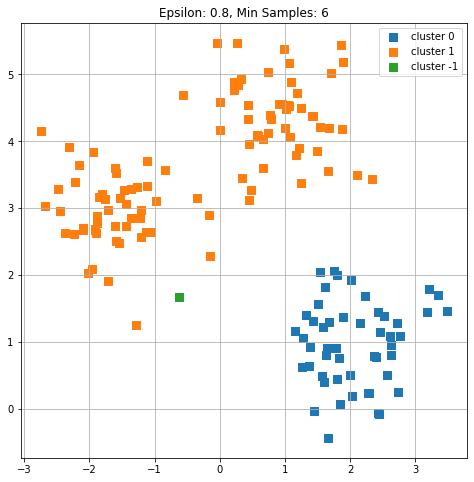

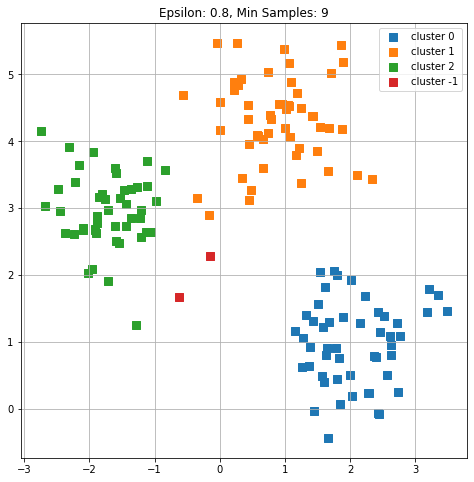

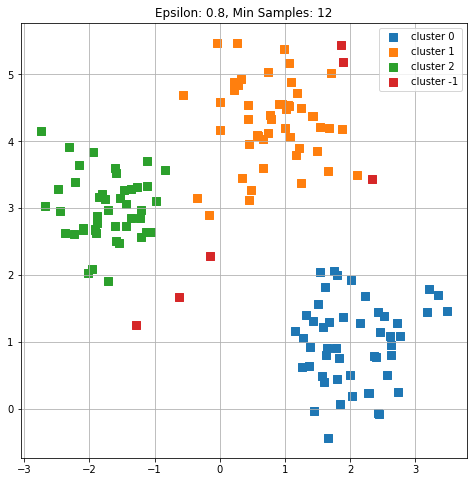

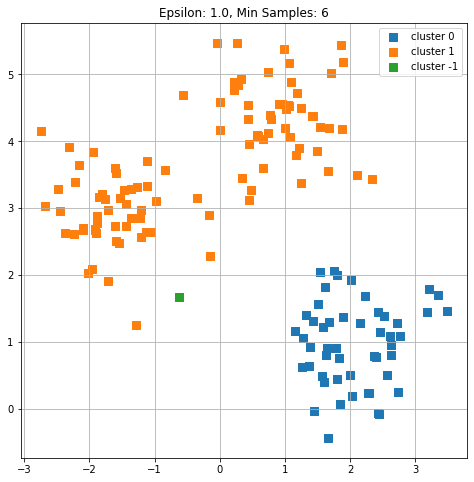

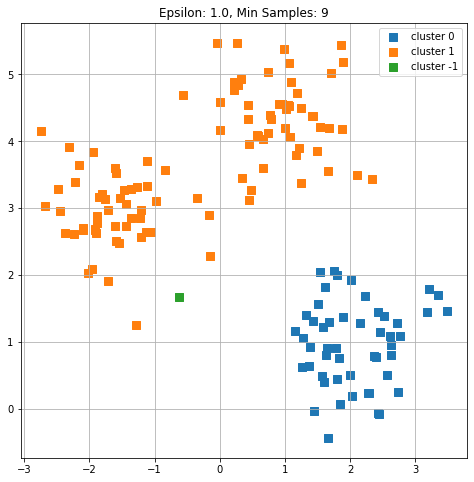

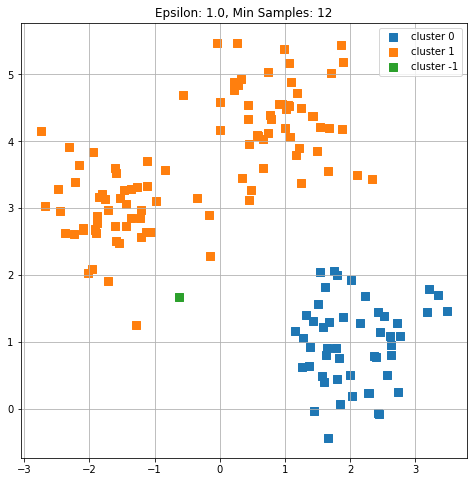

In [75]:
fig, axs = plt.subplots(3,3, figsize=(10,10))
# eps_list = [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
# eps_list = list(range(3,10,3))/10
# min_number_list=list(range(2,20,3))

min_number_list = [6, 9, 12]
eps_list = [0.7, 0.8, 1.0]

indices = list(itertools.product([0,1,2],[0,1,2]))
params = list(itertools.product(eps_list, min_number_list))
                                 
for i in range(len(params)):
#     plt.subplot(3,3,i+1)
    plot_params( params[i][0], params[i][1])
#     axs[indices[i][0],indices[i][1]].plot_params(params[i][0], params[i][1])

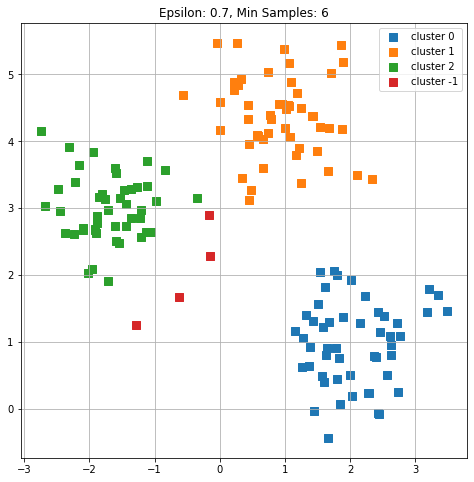

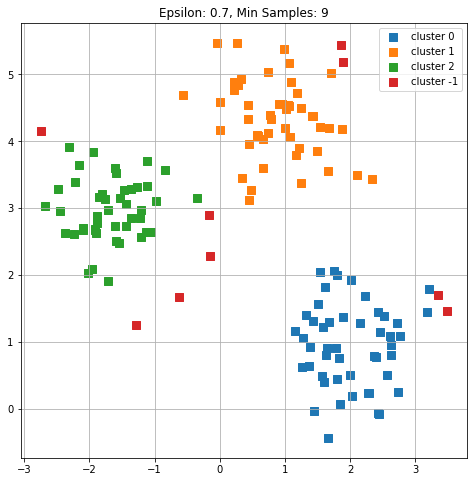

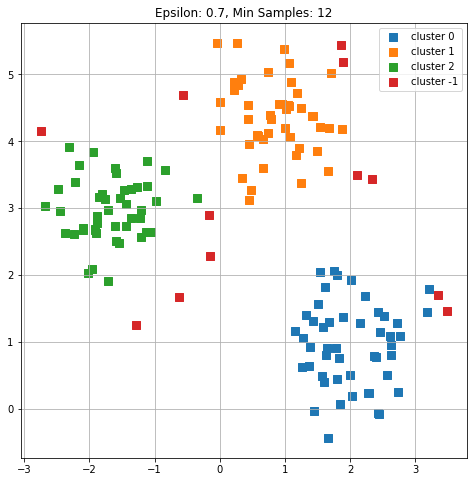

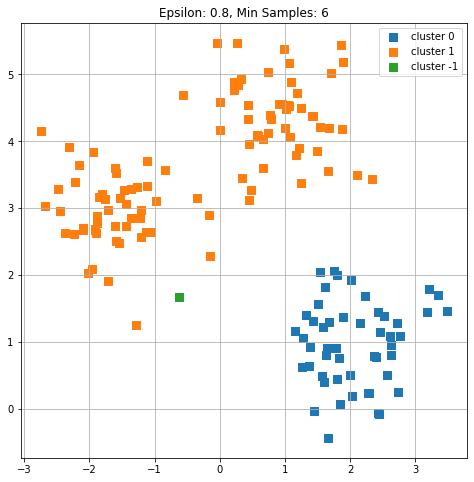

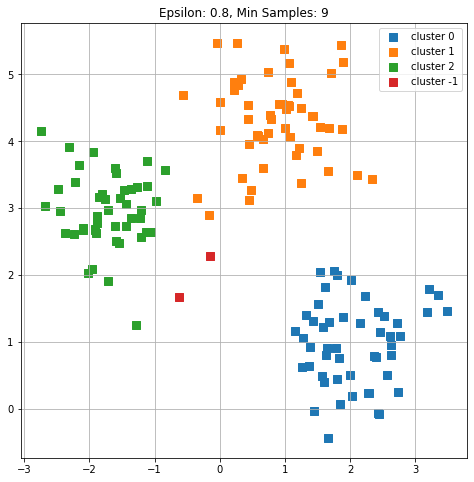

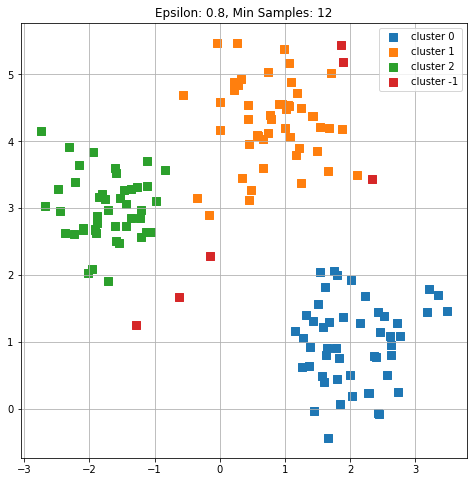

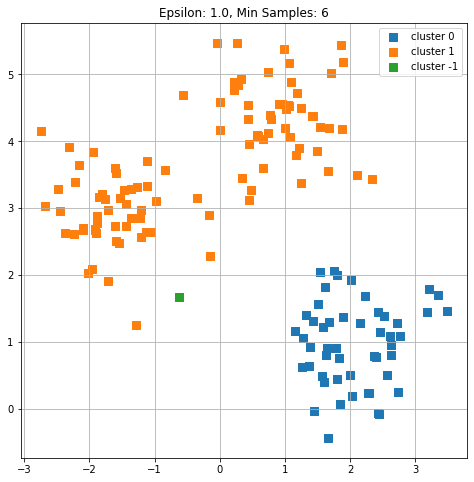

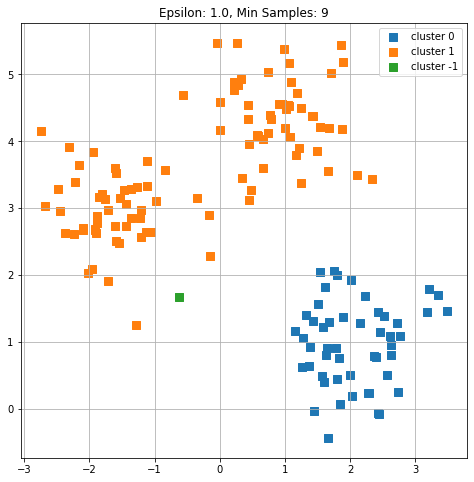

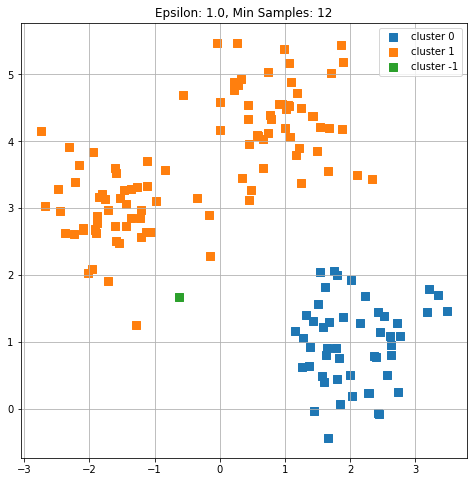

In [50]:
for i in range(len(params)):
    plot_params(params[i][0], params[i][1])

TypeError: plot_clusters() got an unexpected keyword argument 'ax'

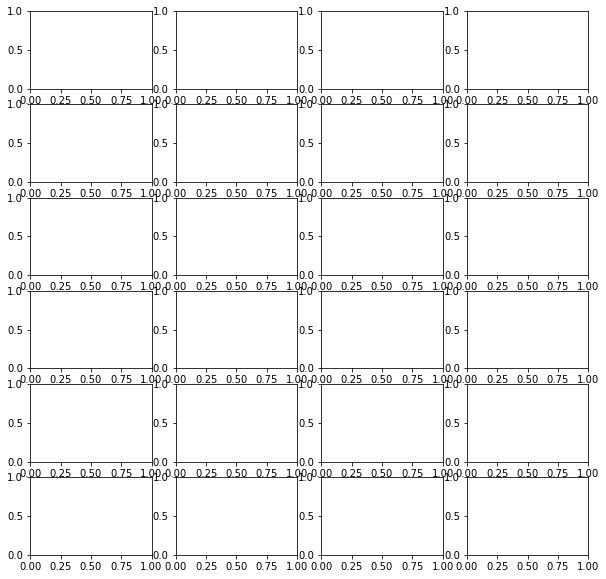

In [18]:
# # from louis
# https://github.com/bmskarate/lighthouseMain/blob/main/w3/w3-day_4/density_models_exercise.ipynb
# fig, axs = plt.subplots(6,4, figsize=(10,10))
# eps_list = [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
# min_number_list = [6, 8, 10, 12]

# a= eps_list
# b = min_number_list
# for row, eps in enumerate(a):
#     for col, minsamples in enumerate(b):
#         db = DBSCAN(eps=eps, 
#             min_samples=minsamples,
#             metric='euclidean')
#         y_db = db.fit_predict(X)
#         plot_clusters('test',X,y_db,ax=axs[row,col])

# for col, minsamples in enumerate(b):
#     axs[2,col].set_xlabel("minsamples=" + str(minsamples))
    
# for row, eps in enumerate(a):
#     axs[row,0].set_ylabel("epsilon=" + str(eps))
    
# #    def plot_clusters(title, X,y_res, plt_cluster_centers = False): 


In [19]:
# fig, axs = plt.subplots(3,3, figsize=(10,10))

# for row, eps in enumerate(a):
#     for col, minsamples in enumerate(b):
#         db = DBSCAN(eps=eps, 
#             min_samples=minsamples,
#             metric='euclidean')
#         y_db = db.fit_predict(X)
#         plot_clusters_dbscan(X,y_db,ax=axs[row,col])

# for col, minsamples in enumerate(b):
#     axs[2,col].set_xlabel("minsamples=" + str(minsamples))
    
# for row, eps in enumerate(a):
#     axs[row,0].set_ylabel("epsilon=" + str(eps))

(1, 6)